## Proyecto análisis de datos 

En este proyecto se quiere intentar entender la problematica actual de la llamada "gentrificación" de la ciudad de Medellín.

En los últimos años se ha percibido una preocupación general en la ciudad de medellín por los precios cada vez más elevados de vida, muchas personas culpan a los extrangeros que llegan a quedarse en la ciudad y gastan en dolares.

El pensamiento general es que al ellos tener mejor capacidad adquisitiva están encareciendo todo por el cambio de su moneda local (mayormente en dolares)

con este estudio se quieren estudiar las llegadas y salidas internacionales del aeropuerto Jose María Cordoba para ver qué tantos individuos han aumentado la población e intentar predecir cuantas personas van a entrar y salir del país, esto con el objetico de prdecir si la población extrangera tiende a la alza o la baja en el futuro.

en el siguiente paso se cargan los datos de legadas y salidas internacionales desde el años 2007 hasta el año 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')



arrivals = pd.read_csv("./llegada_mensual_pasajeros_aeropuerto_de_origen_internacional.csv", sep = ';')
departures = pd.read_csv("./salida_mensual_pasajeros_aeropuerto_destino_internacional.csv", sep = ';')

arrivals.columns


Index(['lle_periodo', 'lle_origenpax', 'lle_cod', 'lle_indicador',
       'lle_valor'],
      dtype='object')

ahora se usa la fecha de las llegadas y salidas como indice para crear una serie de tiempo

In [2]:
arrivals['lle_periodo'] = pd.to_datetime(arrivals['lle_periodo'], format='%Y%m')

arrivals.set_index('lle_periodo', inplace=True)
arrivals.sort_index(inplace=True)


arrivals.head()


,lle_origenpax,lle_cod,lle_indicador,lle_valor
lle_periodo,,,,
2007-01-01,Colombia,CO,LLEGADA_PAX_INTERNA,164.0
2007-01-01,Canadá,CA,LLEGADA_PAX_INTERNA,7.0
2007-01-01,Venezuela,VE,LLEGADA_PAX_INTERNA,2797.0
2007-01-01,Uruguay,UY,LLEGADA_PAX_INTERNA,18.0
2007-01-01,Turquía,TR,LLEGADA_PAX_INTERNA,0.0


In [3]:
departures['sal_periodo'] = pd.to_datetime(departures['sal_periodo'], format='%Y%m')

departures.set_index('sal_periodo', inplace=True)
departures.sort_index(inplace=True)

departures.head()


,sal_codigo,sal_indicador,sal_valor,sal_destinoint
sal_periodo,,,,
2007-01-01,AN,SALIDA_PAX,906.0,Antillas Neerlandesas
2007-01-01,VE,SALIDA_PAX,4215.0,Venezuela
2007-01-01,UY,SALIDA_PAX,14.0,Uruguay
2007-01-01,US,SALIDA_PAX,16643.0,Estados Unidos
2007-01-01,TT,SALIDA_PAX,36.0,Trinidad y Tobago


en el siguiente paso se hará un análisis de completitud de los datos

In [4]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5951 entries, 2007-01-01 to 2022-02-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lle_origenpax  5951 non-null   object
 1   lle_cod        5951 non-null   object
 2   lle_indicador  5951 non-null   object
 3   lle_valor      5951 non-null   object
dtypes: object(4)
memory usage: 232.5+ KB


In [5]:
arrivals['lle_origenpax'].unique()

array(['Colombia', 'Canadá', 'Venezuela', 'Uruguay', 'Turquía',
       'Trinidad y Tobago', 'República Dominicana', 'Perú', 'Bolivia',
       'Paraguay', 'Panamá', 'Nicaragua', 'México', 'Costa Rica', 'Haití',
       'Cuba', 'Brasil', 'Ecuador', 'El Salvador', 'España', 'Honduras',
       'Filipinas', 'Guatemala', 'Antillas Neerlandesas', 'Bahamas',
       'Argentina', 'Estados Unidos', 'Chile', 'Jamaica', 'Belice',
       'Guyana', 'Reino Unido', 'Islas Caimán', 'Italia', 'Japón',
       'Portugal', 'China', 'Francia', 'Alemania', 'Australia',
       'Bermudas', 'Barbados', 'Corea del Sur', 'Emiratos Árabes Unidos',
       'Israel', 'Países Bajos', 'Rusia', 'Senegal', 'Suecia', 'Suiza',
       'Bélgica', 'Grecia', 'Qatar', 'Marruecos', 'Guam', 'Irlanda',
       'Otros países del Caribe', 'San Cristóbal y Nieves', 'Sudáfrica',
       'Jordania', 'Puerto Rico', 'Austria', 'Dinamarca', 'Noruega',
       'Nueva Zelanda', 'Hungría', 'Luxemburgo',
       'ISLAS VÍRGENES BRITÁNICAS', 'Costa 

In [6]:
arrivals['lle_valor'] = pd.to_numeric(arrivals['lle_valor'], errors='coerce')
print(arrivals.isnull().sum())


lle_origenpax      0
lle_cod            0
lle_indicador      0
lle_valor        110
dtype: int64


se evidencia que hay datos vacíos en la columna `lle_valor`, se analiza más profundamente para deducir cuál puede ser la causa y con base en eso tratarlos apropiadamente.

se aíslan las filas con valores nulos (NaN) y se valida si podrían ser ceros

In [7]:
null_rows = arrivals[arrivals['lle_valor'].isnull()]
null_rows

,lle_origenpax,lle_cod,lle_indicador,lle_valor
lle_periodo,,,,
2019-04-01,Nueva Zelanda,NZ,LLEGADA_PAX_INTERNA,NaN
2019-04-01,Noruega,NO,LLEGADA_PAX_INTERNA,NaN
2019-04-01,Jordania,JO,LLEGADA_PAX_INTERNA,NaN
2019-04-01,Suecia,SE,LLEGADA_PAX_INTERNA,NaN
2019-04-01,San Cristóbal y Nieves,KN,LLEGADA_PAX_INTERNA,NaN
...,...,...,...,...
2019-12-01,antigua and barbuda,AG,LLEGADA_PAX_INTERNA,NaN
2019-12-01,Barbados,BB,LLEGADA_PAX_INTERNA,NaN
2019-12-01,Belice,BZ,LLEGADA_PAX_INTERNA,NaN


en esta lista de países con `lle_valor` se pueden notar duplicados, ahora se validará si son todos paíese que no es comín que lleguen pasajeros a colombia

In [8]:
print(null_rows['lle_origenpax'].unique())

['Nueva Zelanda' 'Noruega' 'Jordania' 'Suecia' 'San Cristóbal y Nieves'
 'saint lucia' 'Senegal' 'Croacia' 'Dinamarca' 'india' 'Irlanda'
 'Sudáfrica' 'antigua and barbuda' 'Nicaragua' 'Belice'
 'Trinidad y Tobago' 'Jamaica' 'Marruecos' 'Qatar' 'Islas Caimán'
 'Barbados' 'Haití' 'Venezuela']


de lo anterior se puede deducir que no son países muy comunes por lo tanto es muy probable que los valores sean cero. por eso se procederá a reemplazar los datos nulos por ceros

In [9]:
arrivals['lle_valor'].fillna(0, inplace=True)
print(arrivals.isnull().sum())

lle_origenpax    0
lle_cod          0
lle_indicador    0
lle_valor        0
dtype: int64


ahora se hará lo mismo con las salidas

In [10]:
departures['sal_valor'] = pd.to_numeric(departures['sal_valor'], errors='coerce')
print(departures.isnull().sum())

sal_codigo          0
sal_indicador       0
sal_valor         112
sal_destinoint      0
dtype: int64


In [11]:
null_rows = departures[departures['sal_valor'].isnull()]
null_rows

,sal_codigo,sal_indicador,sal_valor,sal_destinoint
sal_periodo,,,,
2019-04-01,LU,SALIDA_PAX,NaN,Luxemburgo
2019-04-01,KN,SALIDA_PAX,NaN,San Cristóbal y Nieves
2019-04-01,LC,SALIDA_PAX,NaN,saint lucia
2019-04-01,ZA,SALIDA_PAX,NaN,Sudáfrica
2019-04-01,TT,SALIDA_PAX,NaN,Trinidad y Tobago
...,...,...,...,...
2019-12-01,DK,SALIDA_PAX,NaN,Dinamarca
2019-12-01,HR,SALIDA_PAX,NaN,CROACIA
2019-12-01,BZ,SALIDA_PAX,NaN,Belice


al igual que en los casos anterioes se puede decir que eso valores nulos son cero, se procede a reemplazarlos

In [12]:
departures['sal_valor'].fillna(0, inplace=True)
print(departures.isnull().sum())

sal_codigo        0
sal_indicador     0
sal_valor         0
sal_destinoint    0
dtype: int64


teniendo los datos completos se procede a hacer un análisis exploratorio de los datos

## Entendimiento del negocio

**Con estos datos, podemos deducir que estos podrían ser útiles para analizar la movilidad de pasajeros dentro de diferentes países y para comprender mejor las tendencias de viaje.**

El objetivo principal de este dataset es entender y modelar el flujo de entrada y salida de pasajeros en los países. Para esto, se cuenta con dos conjuntos de datos: uno que representa la llegada de pasajeros a cada país y otro que representa la salida de pasajeros desde cada país.

**
## Entendimiento de los datos

Se podría realizar un análisis a largo plazo de las tendencias y patrones de la llegada y salida de pasajeros en los diferentes países.

Tambien se podría explorar la posibilidad de utilizar el análisis de series de tiempo para predecir la llegada y salida de pasajeros en diferentes países en el futuro, teniendo en cuenta las tendencias históricas.
yxc-kiqy-ioc

In [13]:
arrivals['lle_origenpax'].value_counts()

Estados Unidos               182
República Dominicana         182
Brasil                       182
Antillas Neerlandesas        182
Ecuador                      181
                            ... 
Hungría                        1
Luxemburgo                     1
ISLAS VÍRGENES BRITÁNICAS      1
Costa de Marfil                1
Antillas Francesas             1
Name: lle_origenpax, Length: 76, dtype: int64

In [14]:
departures['sal_destinoint'].value_counts()

Estados Unidos           182
Ecuador                  181
Panamá                   180
República Dominicana     180
Antillas Neerlandesas    179
                        ... 
Letonia                    1
Irán                       1
Malasia                    1
Hungría                    1
Guadalupe                  1
Name: sal_destinoint, Length: 80, dtype: int64

In [15]:
# Ordenar los datos por fecha
arrivals = arrivals.sort_index()
arrivals['lle_valor'] = pd.to_numeric(arrivals['lle_valor'], errors='coerce')

# Agrupar los datos por país de origen y calcular la suma de llegadas
arrivals_dates = arrivals.groupby('lle_periodo')['lle_valor'].sum()
arrivals_dates

lle_periodo
2007-01-01     26447.0
2007-02-01     15191.0
2007-03-01     18883.0
2007-04-01     19036.0
2007-05-01     20853.0
                ...   
2021-10-01     84267.0
2021-11-01     88836.0
2021-12-01    111019.0
2022-01-01     91991.0
2022-02-01     73609.0
Name: lle_valor, Length: 182, dtype: float64

In [16]:
departures = departures.sort_index()
departures['sal_valor'] = pd.to_numeric(departures['sal_valor'], errors='coerce')

# Agrupar los datos por país de origen y calcular la suma de llegadas
departures_dates = departures.groupby('sal_periodo')['sal_valor'].sum()
departures_dates

sal_periodo
2007-01-01     33981.0
2007-02-01     18209.0
2007-03-01     21678.0
2007-04-01     21842.0
2007-05-01     21012.0
                ...   
2021-10-01     83935.0
2021-11-01     87859.0
2021-12-01     99794.0
2022-01-01    102787.0
2022-02-01     76352.0
Name: sal_valor, Length: 182, dtype: float64

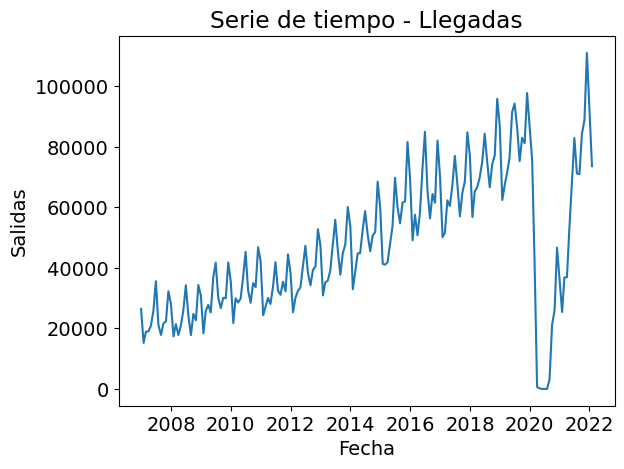

In [17]:
# Datos de llegadas
plt.plot(arrivals_dates.index, arrivals_dates)
plt.xlabel('Fecha')
plt.ylabel('Salidas')
plt.title('Serie de tiempo - Llegadas')
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(arrivals_dates, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -2.075935
p-value                   0.254301
Lags Used                14.000000
No. of Obs              167.000000
Critical Value (1%)      -3.470126
Critical Value (5%)      -2.879008
Critical Value (10%)     -2.576083
dtype: float64


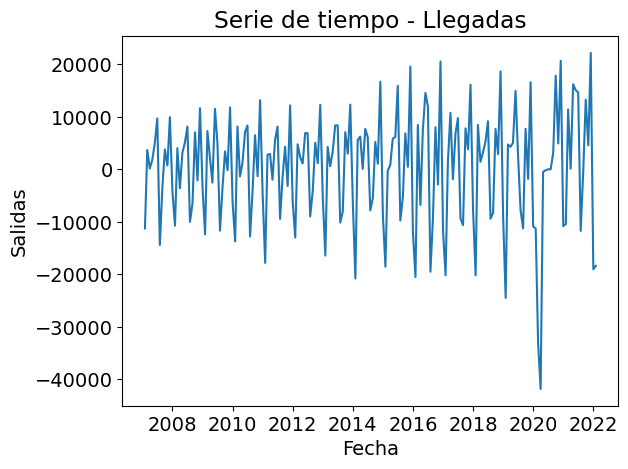

In [19]:
### Llevar la serie a diferencias
diff_arrivals = arrivals_dates.diff().dropna()

plt.plot(diff_arrivals.index, diff_arrivals)
plt.xlabel('Fecha')
plt.ylabel('Salidas')
plt.title('Serie de tiempo - Llegadas')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(diff_arrivals, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -4.675226
p-value                   0.000094
Lags Used                14.000000
No. of Obs              166.000000
Critical Value (1%)      -3.470370
Critical Value (5%)      -2.879114
Critical Value (10%)     -2.576139
dtype: float64


Podemos deducir que es estacional, sin embargo podemos observar en la serie de tiempo que hay outliers en un periodo del 2020 a 2021 aproximadamente, esto debido al cierre que hubo por la pandemia.

In [21]:
X = arrivals_dates.copy()
size = int(len(X) * 0.8)
train_arrivals, test_arrivals = X[0:size], X[size:len(X)]
train_arrivals

lle_periodo
2007-01-01    26447.0
2007-02-01    15191.0
2007-03-01    18883.0
2007-04-01    19036.0
2007-05-01    20853.0
               ...   
2018-09-01    66588.0
2018-10-01    74293.0
2018-11-01    77188.0
2018-12-01    95846.0
2019-01-01    86927.0
Name: lle_valor, Length: 145, dtype: float64

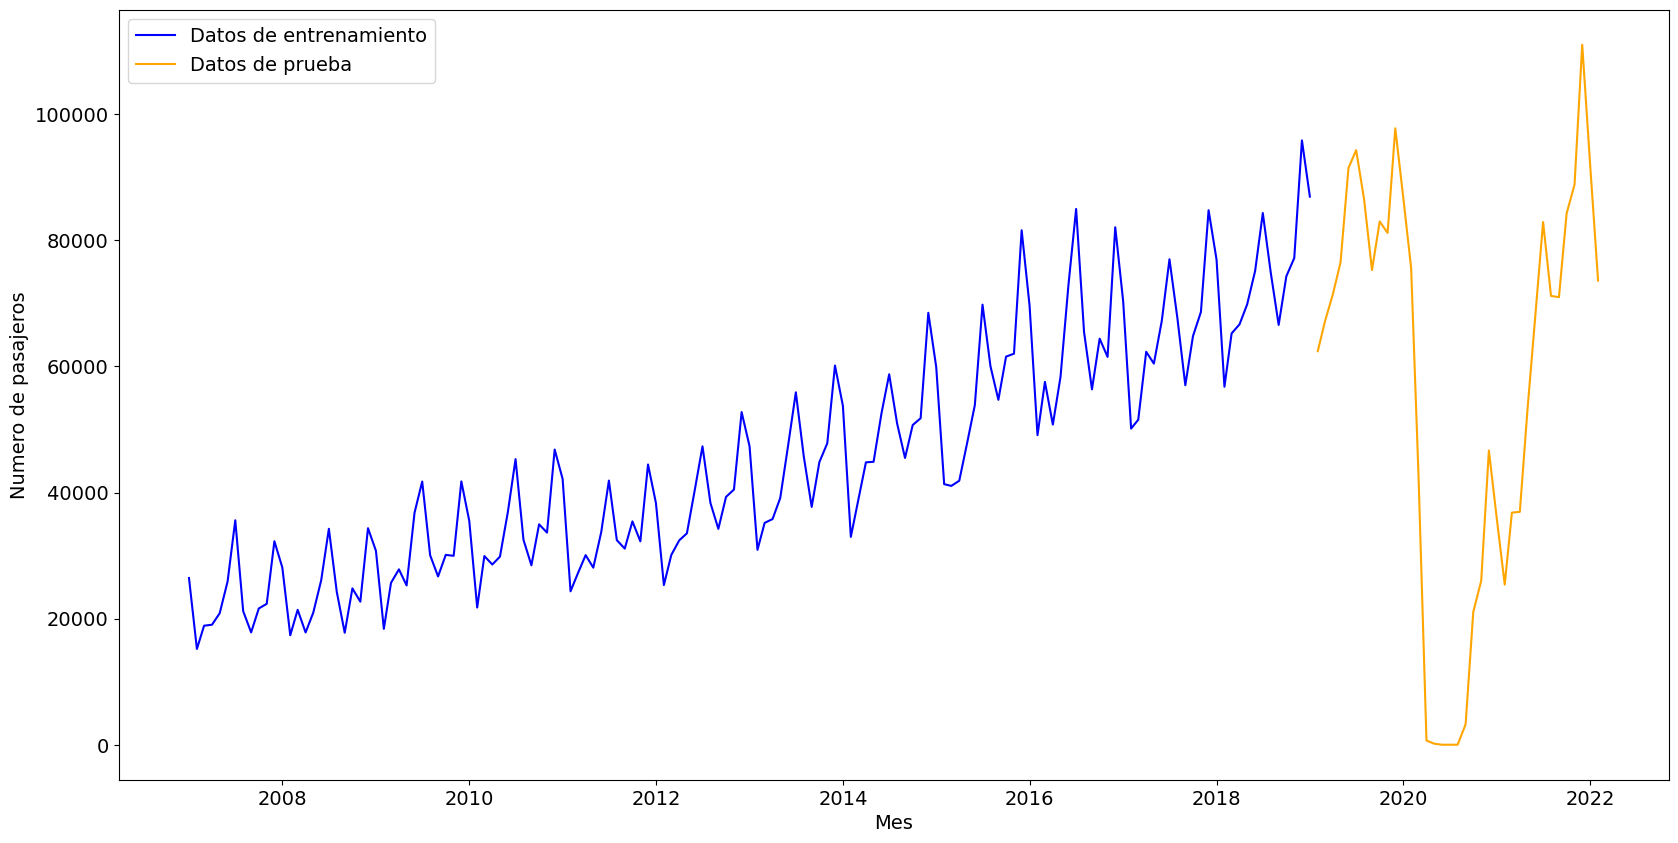

In [22]:
plt.figure(figsize=(20,10))
plt.xlabel("Mes")
plt.ylabel("Numero de pasajeros")
plt.plot(train_arrivals, color='blue', label='Datos de entrenamiento')
plt.plot(test_arrivals, color='orange', label='Datos de prueba')
plt.legend()

plotting ARIMA model


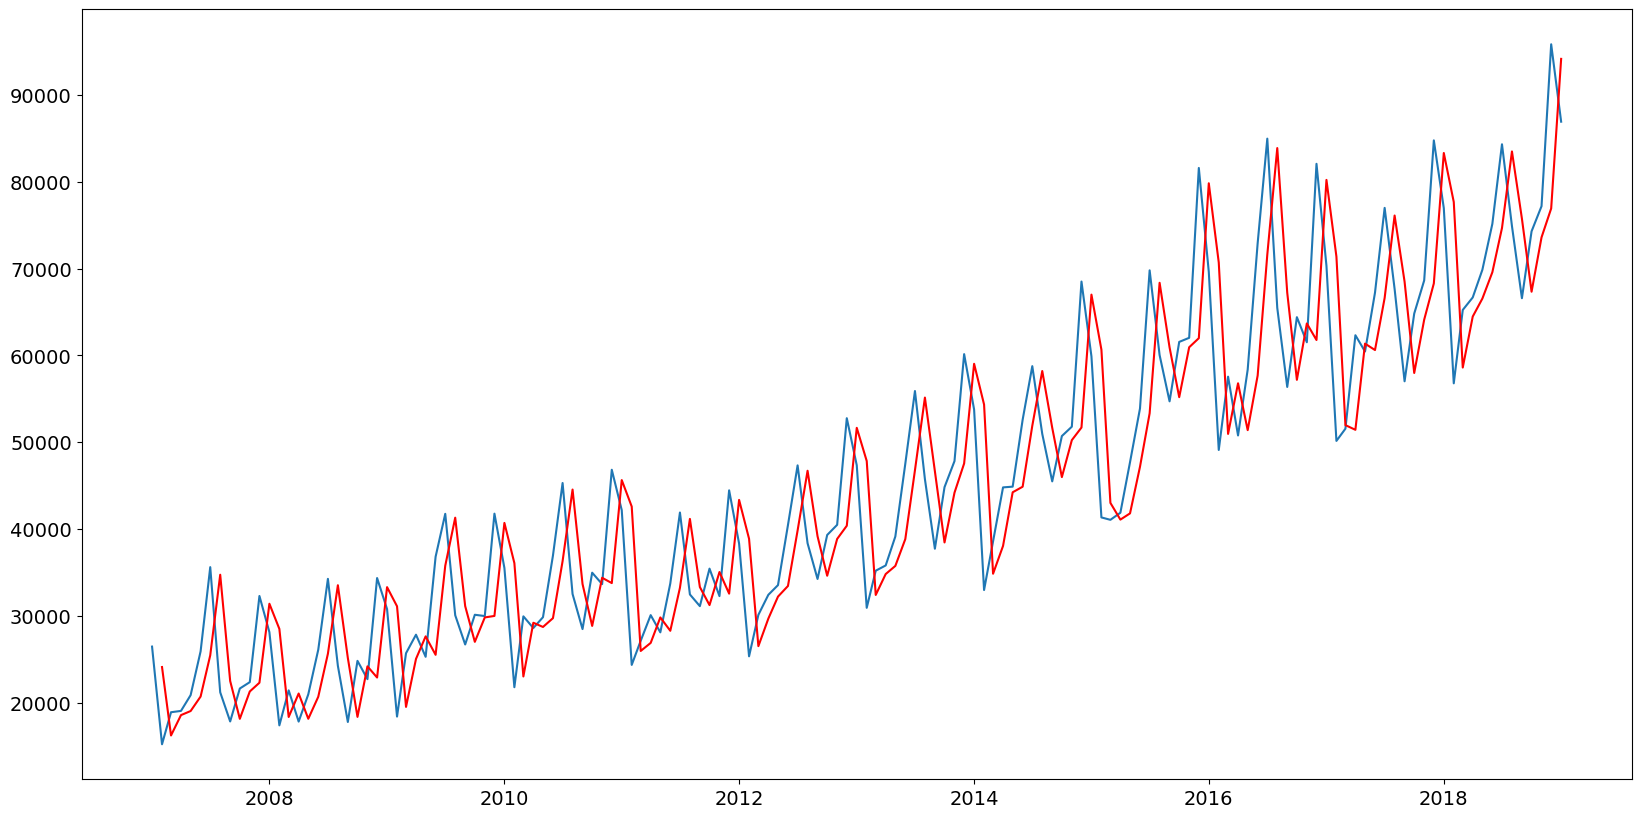

In [23]:
#AR Arrivals

from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,10))

model=ARIMA(train_arrivals, order=(1,1,0)) # p, d, q
results=model.fit()
plt.plot(train_arrivals)

prediccion_ar1 = results.fittedvalues[1:] ## Devuelve la prediccion en niveles

plt.plot(prediccion_ar1, color='red')
print('plotting ARIMA model')

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(train_arrivals[1:], prediccion_ar1)
mae = mean_absolute_error(train_arrivals[1:], prediccion_ar1)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

MSE: 82158613.02620989
MAE: 7418.7169764752425


plotting ARIMA model


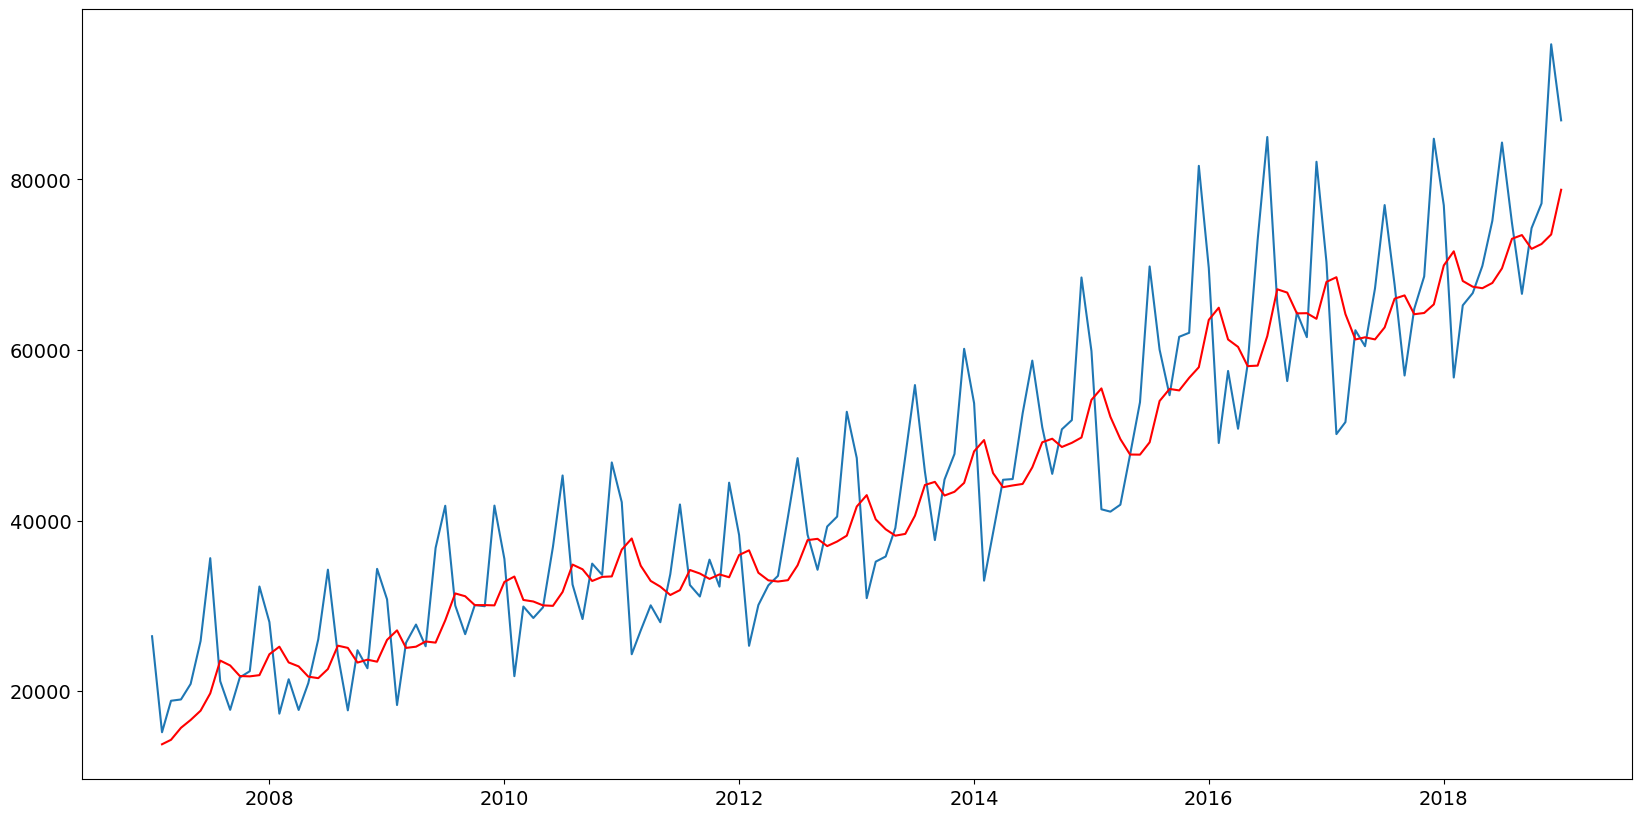

In [25]:
#MA

plt.figure(figsize=(20,10))

model=ARIMA(train_arrivals, order=(0,1,1)) # p, d, q
results=model.fit()
plt.plot(train_arrivals)

prediccion_ma1 = results.fittedvalues[1:]

plt.plot(prediccion_ma1, color='red')
print('plotting ARIMA model')

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(train_arrivals[1:], prediccion_ma1)
mae = mean_absolute_error(train_arrivals[1:], prediccion_ma1)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

MSE: 74068751.9946954
MAE: 6441.829418941548


plotting ARIMA model


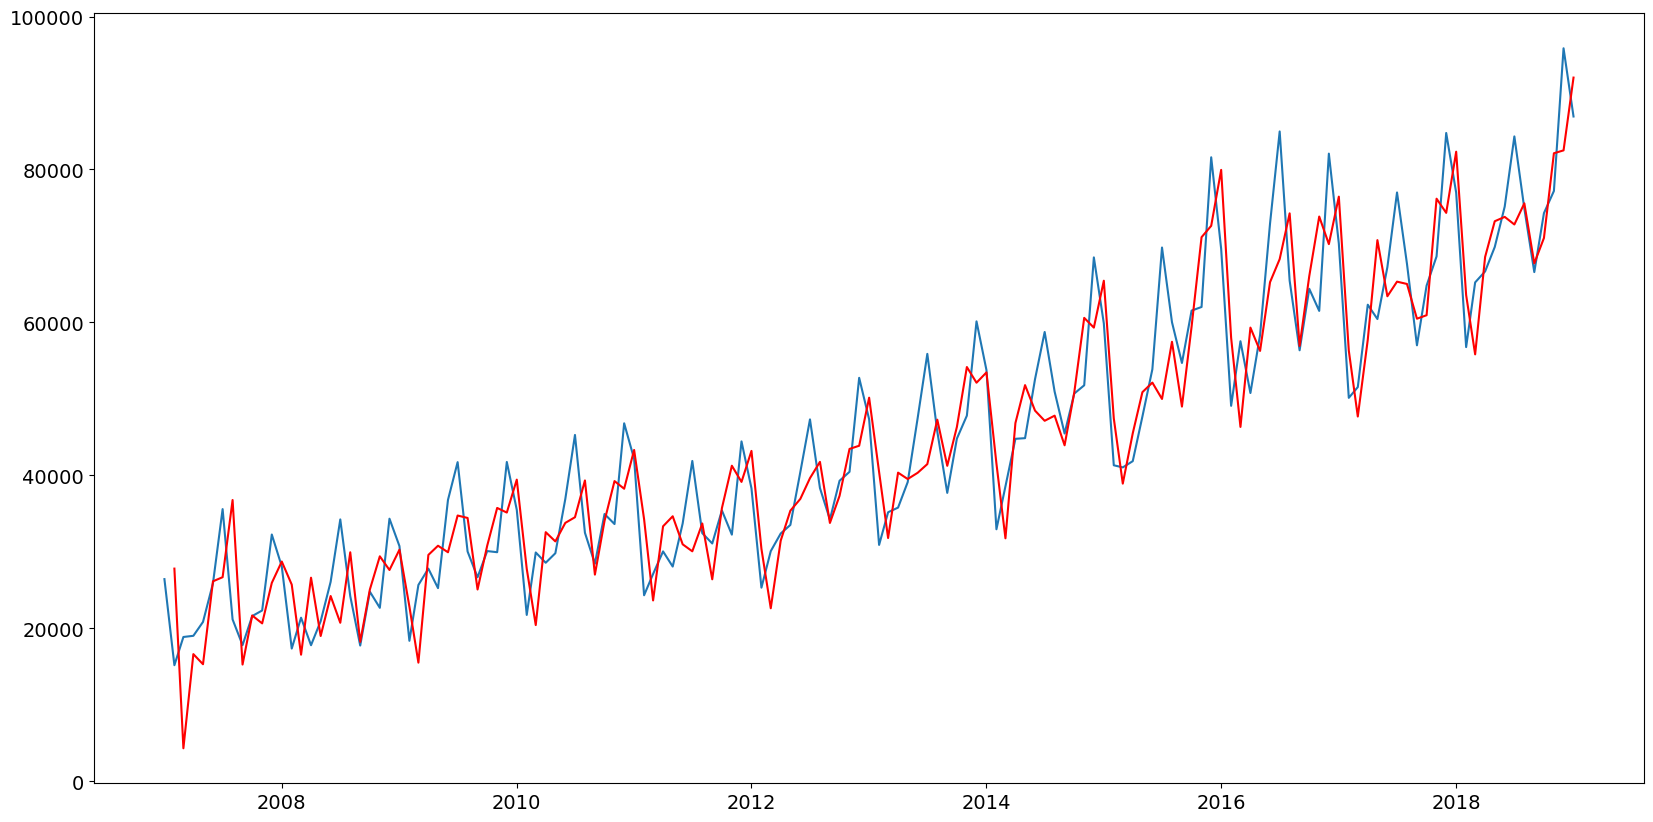

In [27]:
#ARIMA
plt.figure(figsize=(20,10))

model=ARIMA(train_arrivals, order=(3,1,3)) # p, d, q
results=model.fit()
plt.plot(train_arrivals)

prediccion_arima =  results.fittedvalues[1:]

plt.plot(prediccion_arima, color='red')
print('plotting ARIMA model')

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(train_arrivals[1:], prediccion_arima)
mae = mean_absolute_error(train_arrivals[1:], prediccion_arima)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

MSE: 46649993.62307514
MAE: 5534.243621479836


plotting ARIMA model


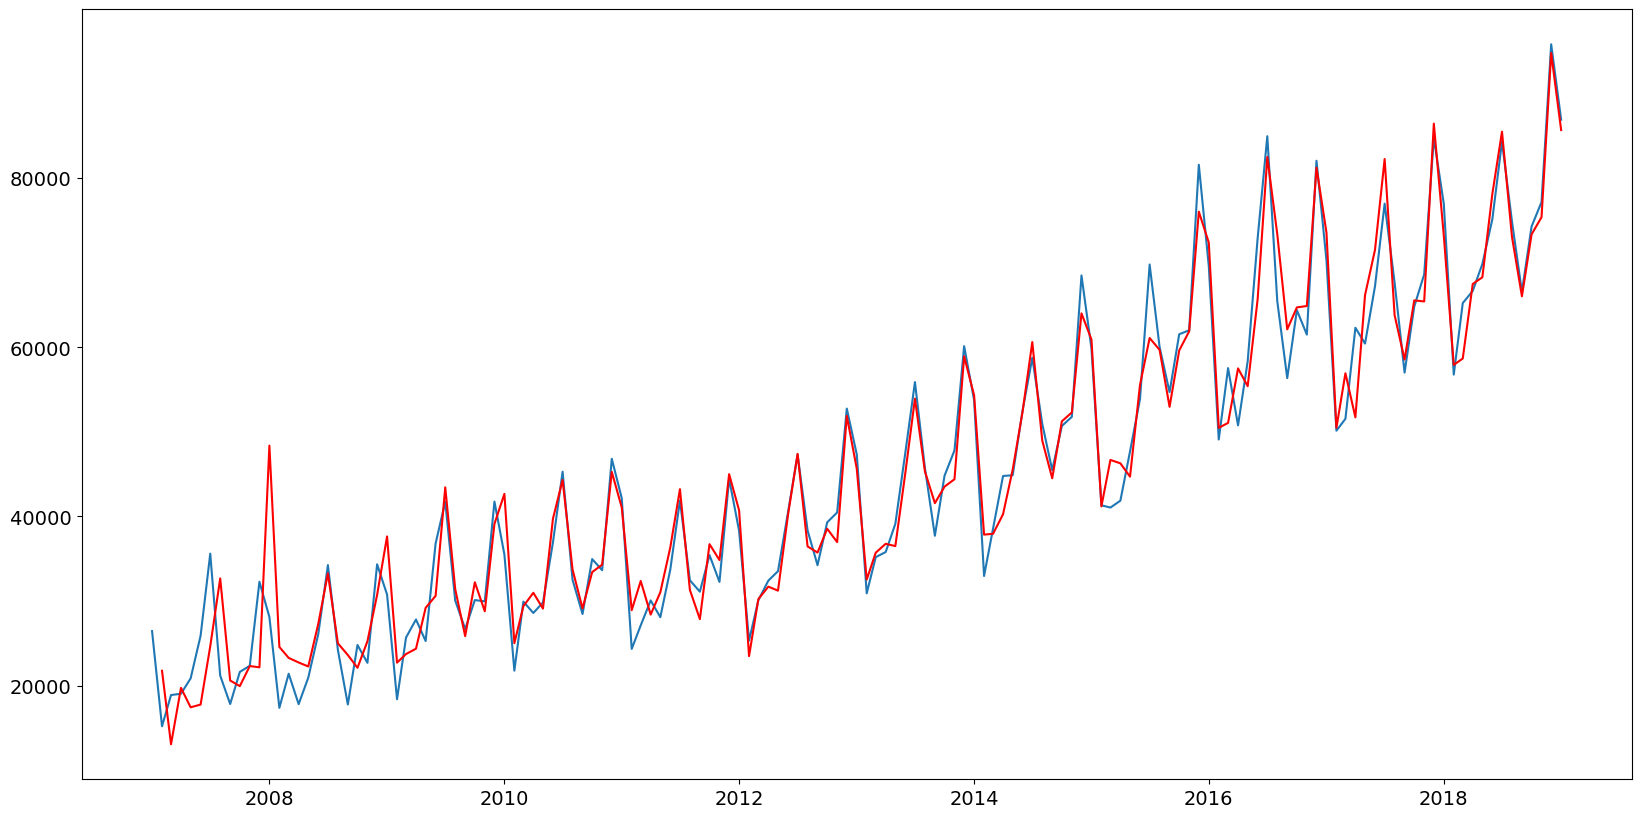

In [29]:

plt.figure(figsize=(20,10))

# Este es un ARIMA (3,1,3), pero además en la parte estacional pongo P,D,Q,S igual a 2,1,2,12. 
model=ARIMA(train_arrivals, order=(3,1,3), seasonal_order=(2, 1, 2, 12) ) #


results=model.fit()
plt.plot(train_arrivals)

prediccion_sarima = results.fittedvalues[1:]

plt.plot(prediccion_sarima, color='red')
print('plotting ARIMA model')

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(train_arrivals[1:], prediccion_sarima)
mae = mean_absolute_error(train_arrivals[1:], prediccion_sarima)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

MSE: 16400300.555024765
MAE: 2896.609142789049
